# Exercise 4.10.1: Coding Etiquette & Excel Reporting

### Table of Contents
#### STEP 1 - Import data
#### STEP 2 - PII
#### STEP 3 - Spending by geographic area
#### STEP 4 - Exclusion flag for low-activity customers
#### STEP 5 - Customer profiling variable (age, income, certain products)

## STEP 1: Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

#01. Importing Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path

path = r'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_4/Instacart Basket Analysis'

In [3]:
path

'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_4/Instacart Basket Analysis'

In [4]:
# Import newly-merged dataframe

instacart = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'instacart.pkl'))

In [5]:
instacart.shape

(32434212, 31)

## STEP 2: Consider any security implications that might exist for this new data. You'll need to address any PII data in the data before continuing your analysis.

In [6]:
instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   order_id                int64  
 6   user_id                 int64  
 7   order_number            int64  
 8   order_day_of_week       int64  
 9   order_hour_of_day       int64  
 10  days_since_prior_order  float64
 11  add_to_cart_order       int64  
 12  reordered               int64  
 13  busiest_day             object 
 14  busiest_days            object 
 15  busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
 18  mean_price              float64
 19  spending_flag           object 
 20  median_days             float64
 21  frequency_flag          objec

In [7]:
pd.options.display.max_columns = None
instacart.head(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Regularly busy days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
5,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,24.0,3,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
7,6184,Clementines,32,4,4.3,1977647,138,30,6,17,20.0,3,0,Regularly busy,Regularly busy days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
8,6901,Raisin Bran,121,14,2.9,1154289,138,18,1,7,3.0,2,0,Regularly busy,Busiest days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
9,7147,Classic Baby Creamers Potatoes,83,4,9.0,930730,138,2,0,12,9.0,3,0,Busiest day,Busiest days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


### Personally identifiable information (PII) is present in this data set in the form of customers' first and last names. Names have been excluded from the following analysis and will not be shared publicly, therefore should not pose any security risks.

## STEP 3: The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data, and determine whether there's a difference in spending habits between the different U.S. regions.

In [8]:
# Defining Regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan','Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Creating 'Region' column based on 'State' column
instacart.loc[instacart['state'].isin (Northeast), 'region'] = 'Northeast'
instacart.loc[instacart['state'].isin (Midwest), 'region'] = 'Midwest'
instacart.loc[instacart['state'].isin (South), 'region'] = 'South'
instacart.loc[instacart['state'].isin (West), 'region'] = 'West'

In [10]:
# Checking new column
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Regularly busy days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest


In [11]:
instacart['region'].value_counts()

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [12]:
# Checking spending habits of customers by region

spen_hab = pd.crosstab(instacart['region'], instacart['spending_flag'], dropna = False)

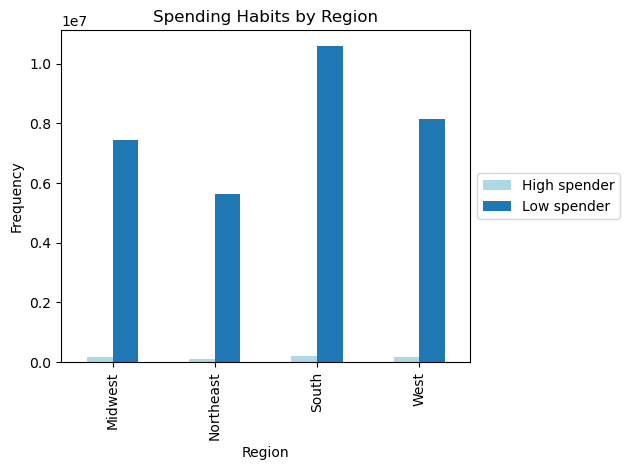

In [13]:
# Creating bar chart

bar_region = spen_hab.plot.bar(color = ['lightblue','tab:blue'])
plt.title('Spending Habits by Region', fontsize = 12)
plt.xlabel('Region', fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.tight_layout()    # Automatically adjust subplot parameters

In [14]:
# Exporting bar chart as image file

bar_region.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'spen_hab_bar.png'), bbox_inches='tight')

## STEP 4: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure to export this sample.

In [15]:
# Creating exclusion flag for low-activity customers with less than five orders

instacart.loc[instacart['max_order'] >= 5, 'customer_activity'] = 'Highly active'

In [16]:
instacart.loc[instacart['max_order'] < 5, 'customer_activity'] = 'Lowly active'

In [17]:
# Checking new 'customer_activity' column's values

instacart['customer_activity'].value_counts(dropna = False)

customer_activity
Highly active    30992664
Lowly active      1441548
Name: count, dtype: int64

In [18]:
instacart.head(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,region,customer_activity
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Regularly busy days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active
5,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,24.0,3,0,Regularly busy,Regularly busy days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active
7,6184,Clementines,32,4,4.3,1977647,138,30,6,17,20.0,3,0,Regularly busy,Regularly busy days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active
8,6901,Raisin Bran,121,14,2.9,1154289,138,18,1,7,3.0,2,0,Regularly busy,Busiest days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active
9,7147,Classic Baby Creamers Potatoes,83,4,9.0,930730,138,2,0,12,9.0,3,0,Busiest day,Busiest days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Highly active


In [19]:
instacart.tail(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,region,customer_activity
32434192,49235,Organic Half & Half,53,16,1.8,3368888,27382,1,4,9,NaN,1,0,Least busy,Least busy days,Most orders,9,New customer,1.8,Low spender,19.5,Regular customer,Anna,Allison,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,Highly active
32434193,49235,Organic Half & Half,53,16,1.8,813102,27382,2,1,8,25.0,1,1,Regularly busy,Busiest days,Average orders,9,New customer,1.8,Low spender,19.5,Regular customer,Anna,Allison,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,Highly active
32434194,49235,Organic Half & Half,53,16,1.8,2939801,27382,3,3,8,2.0,1,1,Regularly busy,Least busy days,Average orders,9,New customer,1.8,Low spender,19.5,Regular customer,Anna,Allison,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,Highly active
32434195,49235,Organic Half & Half,53,16,1.8,698928,27382,4,3,7,21.0,1,1,Regularly busy,Least busy days,Average orders,9,New customer,1.8,Low spender,19.5,Regular customer,Anna,Allison,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,Highly active
32434196,49235,Organic Half & Half,53,16,1.8,3310701,27382,5,3,9,28.0,1,1,Regularly busy,Least busy days,Most orders,9,New customer,1.8,Low spender,19.5,Regular customer,Anna,Allison,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,Highly active
32434197,49235,Organic Half & Half,53,16,1.8,527883,27382,6,1,12,26.0,1,1,Regularly busy,Busiest days,Most orders,9,New customer,1.8,Low spender,19.5,Regular customer,Anna,Allison,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,Highly active
32434198,49235,Organic Half & Half,53,16,1.8,685496,27382,7,4,8,17.0,1,1,Least busy,Least busy days,Average orders,9,New customer,1.8,Low spender,19.5,Regular customer,Anna,Allison,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,Highly active
32434199,49235,Organic Half & Half,53,16,1.8,1224680,27382,8,1,7,18.0,1,1,Regularly busy,Busiest days,Average orders,9,New customer,1.8,Low spender,19.5,Regular customer,Anna,Allison,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,Highly active
32434200,49235,Organic Half & Half,53,16,1.8,2223687,27382,9,2,12,15.0,1,1,Regularly busy,Regularly busy days,Most orders,9,New customer,1.8,Low spender,19.5,Regular customer,Anna,Allison,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,Highly active
32434201,49235,Organic Half & Half,53,16,1.8,1365409,56454,1,4,9,NaN,1,0,Least busy,Least busy days,Most orders,4,New customer,1.8,Low spender,6.0,Frequent customer,Christopher,Velazquez,Male,Washington,21,2/16/2019,3,living with parents and siblings,27361,West,Lowly active


In [20]:
# Creating subset of 'highly active' customers

high_act_cust = instacart[instacart['customer_activity'] == 'Highly active']

In [21]:
high_act_cust.shape

(30992664, 33)

In [22]:
# Creating subset of 'lowly active' customers

low_act_cust = instacart[instacart['customer_activity'] == 'Lowly active']

In [23]:
low_act_cust.shape

(1441548, 33)

In [24]:
len(high_act_cust) + len(low_act_cust)

32434212

In [25]:
len(instacart)

32434212

In [26]:
# Exporting high activity subset

high_act_cust.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'highly_active_customers.pkl'))

In [27]:
# Exporting low activity subset

low_act_cust.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'lowly_active_customers.pkl'))

## STEP 5: Create a profiling variable based on age, income, certain goods in the "department_id" column, and number of dependants. You might also use the "order_day_of_week" and "order_hour_of_day" columns if you can think of a way they would impact customer profiles (for example, "single adult" or "young parent").

In [28]:
# Importing highly-active customer data

df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'highly_active_customers.pkl'))

In [29]:
df.shape

(30992664, 33)

### Customer Profiling - Age groups

In [31]:
df['age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### Minimum customer age is 18 and maximum is 81 years old.

In [30]:
# Creating flags for age groups

df.loc[df['age'] < 40, 'age_group'] = 'Under 40'

In [32]:
df.loc[(df['age'] >= 40) & (df['age'] < 65), 'age_group'] = 'Middle Age'

In [33]:
df.loc[df['age'] >= 65, 'age_group'] = 'Seniors 65+'

In [34]:
df['age_group'].value_counts(dropna = False)

age_group
Middle Age     12115268
Under 40       10674650
Seniors 65+     8202746
Name: count, dtype: int64

#### Age groups divided into three segments: Under 40 years, Middle Age (40-64 yrs), Seniors 65+

### Customer Profiling - Income 

In [35]:
# Checking frequency of 'income' column

df['income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

In [36]:
# Creating flags for income column based on above result

df.loc[df['income'] < 67000,'income_group']= 'Lower income'

In [37]:
df.loc[(df['income'] >= 67000) & (df['income'] <= 128000), 'income_group'] = 'Middle income'

In [38]:
df.loc[df['income'] > 128000,'income_group']= 'Higher income'

In [39]:
# Checking results

df['income_group'].value_counts(dropna = False)

income_group
Middle income    15563904
Higher income     7759863
Lower income      7668897
Name: count, dtype: int64

### Customer Profiling - Departments

In [40]:
# Importing deparments df

df_dep = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_Data', 'departments_wrangled.csv'), index_col = False)

In [41]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [42]:
# Renaming Unnamed column to department_id

df_dep = df_dep.rename(columns = {'Unnamed: 0' : 'department_id'})

In [43]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [44]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30992664 entries, 0 to 32434200
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   order_id                int64  
 6   user_id                 int64  
 7   order_number            int64  
 8   order_day_of_week       int64  
 9   order_hour_of_day       int64  
 10  days_since_prior_order  float64
 11  add_to_cart_order       int64  
 12  reordered               int64  
 13  busiest_day             object 
 14  busiest_days            object 
 15  busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
 18  mean_price              float64
 19  spending_flag           object 
 20  median_days             float64
 21  frequency_flag          object 
 2

In [46]:
# Merging departments df with current df

df_merged = df.merge(df_dep, on = 'department_id')

In [47]:
# Checking results

df_merged[['user_id', 'department_id', 'department']].head()

,user_id,department_id,department
0,138,19,snacks
1,138,19,snacks
2,138,19,snacks
3,138,19,snacks
4,138,19,snacks


In [48]:
df_merged[['user_id', 'department_id', 'department']].tail()

,user_id,department_id,department
30992659,137486,18,babies
30992660,168325,18,babies
30992661,160916,18,babies
30992662,160916,18,babies
30992663,175617,18,babies


In [49]:
df_merged.shape

(30992664, 36)

### Customer Profiling - Dependants

In [50]:
# Creating flags based on number of dependants

df_merged.loc[(df_merged['family_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_merged['number_of_dependants']==0), 'Family_Status_Flag'] = 'Single with NO Dependants'

In [51]:
df_merged.loc[(df_merged['family_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_merged['number_of_dependants'] >=1), 'Family_Status_Flag'] = 'Single WITH Dependants'

In [52]:
df_merged.loc[(df_merged['family_status'] == 'married') & (df_merged['number_of_dependants'] == 1), 'Family_Status_Flag'] = 'Married with NO Dependants'

In [53]:
df_merged.loc[(df_merged['family_status'] == 'married') & (df_merged['number_of_dependants'] > 1), 'Family_Status_Flag'] = 'Married WITH Dependants'

In [54]:
# Checking frequency of flag

df_merged['Family_Status_Flag'].value_counts(dropna = False)

Family_Status_Flag
Married WITH Dependants       14545479
Single with NO Dependants      7747032
Married with NO Dependants     7217542
Single WITH Dependants         1482611
Name: count, dtype: int64

### Exporting dataframe

In [55]:
# Exporting new df

df_merged.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'instacart_final.pkl'))